# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import nltk
from nltk.tokenize import word_tokenize
from collections import Counter
from nltk.corpus import cmudict
from nltk import pos_tag
import string
from nltk.corpus import wordnet as wn
from nltk.stem import WordNetLemmatizer
import spacy
from nltk.util import ngrams

In [2]:
# Download necessary NLTK data
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('cmudict')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package cmudict to /root/nltk_data...
[nltk_data]   Package cmudict is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Data Load

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Kaggle/preprocessed_dataset.csv')

In [5]:
df

,text,label
0,feel realli helpless heavi heart,fear
1,ive enjoy abl slouch relax unwind frank need l...,sadness
2,gave internship dmrg feel distraught,fear
3,dont know feel lost,sadness
4,kindergarten teacher thorough weari job taken ...,fear
...,...,...
416118,feel like tell horni devil find site suit sort...,love
416119,began realiz feel agit restless would thought ...,anger
416120,feel curious previous earli dawn time seek troubl,surprise
416121,feel becuas tyran natur govern el salvador sav...,anger


In [6]:
# Store the 'text' column in a variable
text_data = df['text']
# Ensure text_data has no NaN values and is in string format
text_data = text_data.fillna('').astype(str)

# Feature Analysis

##  1. Phonological Features (Sound-based)
Phonological features are sound-related, and since we are working with text data, we can't extract phonetic features directly. However, we can analyze the word length distribution or syllables per word as a proxy for phonological aspects.
* Focus on the sound patterns of language.

* Examples:

    1. Phonemes (basic units of sound, e.g., /p/, /b/).
    2. Stress patterns (e.g., syllable emphasis).
    3. Intonation (rise and fall of pitch in speech).

### Syllable Count Distribution

This script calculates the number of syllables in each sentence using the CMU Pronouncing Dictionary and visualizes the distribution.

1. Syllable Counting:

  * For each word in the text, the script uses the CMU dictionary to find the number of syllables (based on phonemes ending in digits, e.g., AH1).
  * If a word is not found in the dictionary, it defaults to 1 syllable.
2. Sentence Syllable Count:

  * The total syllables for each sentence are calculated by summing the syllable counts of all words in that sentence.
3. Visualization:

  * A histogram is plotted using Seaborn to show the frequency of sentences with varying syllable counts.
  * Custom styling is applied to make the chart visually appealing.
The plot provides insights into the complexity of the text data, helping to analyze sentence structure or readability.

<Figure size 640x480 with 0 Axes>

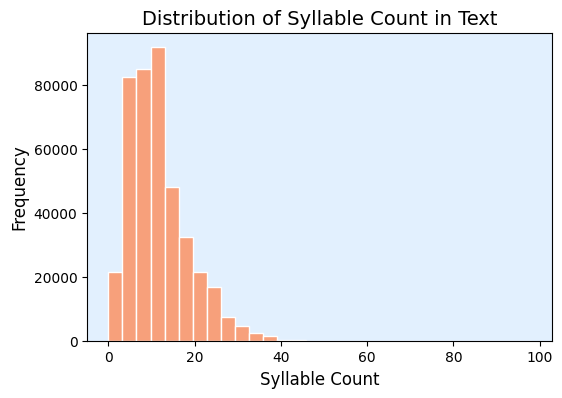

In [7]:
# Load CMU Pronouncing Dictionary
d = cmudict.dict()

# Syllable count function using CMU Pronouncing Dictionary
def syllable_count(word):
    word = word.lower()
    if word in d:
        # Count syllables in the word
        return max([len([y for y in pron if y[-1].isdigit()]) for pron in d[word]])
    else:
        return 1  # Default to 1 if word is not in CMU dict

# Apply syllable count to words in each sentence
syllable_counts = text_data.apply(
    lambda x: sum([syllable_count(word) for word in word_tokenize(x)])
)
plt.gcf().set_facecolor('#b1d8fe')  # Set figure background color
# Plot syllable count distribution using Seaborn
plt.figure(figsize=(6, 4))
sns.histplot(syllable_counts, bins=30, kde=False, color='#ff864f', edgecolor='white')
plt.title('Distribution of Syllable Count in Text', fontsize=14)
plt.xlabel('Syllable Count', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
# Set the axis background color to a light blue
plt.gca().set_facecolor('#e2f0fe')
plt.show()

## 2. Morphological Features
We can extract word length and word frequency as morphological features. We will also perform lemmatization to reduce words to their base forms.
* Related to the structure of words and how they are formed.

* Examples:

    1. Prefixes and suffixes (e.g., "un-", "-ing").
    2. Root words (e.g., "happy" in "unhappiness").
    3. Word formation rules (e.g., pluralization: dog → dogs).

### Root Words Analysis

Lemmatization is a natural language processing technique that reduces words to their base or root form (e.g., "running" → "run"). This script uses the WordNet Lemmatizer to:

1. Tokenize and lemmatize words in the text dataset.
2. Compare original words with their lemmatized forms.
3. Visualize the count of words that need lemmatization versus those already in their root form.

The resulting bar chart highlights how much preprocessing is required for the given text data.

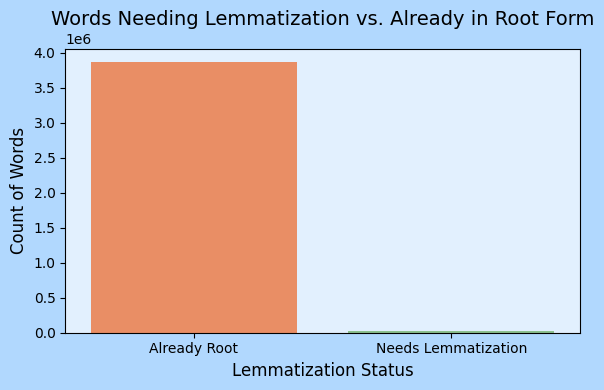

In [7]:
# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Tokenize and lemmatize words in the text data
all_words = ' '.join(text_data).split()
lemmatized_words = [lemmatizer.lemmatize(word) for word in all_words]

# Compare original words and lemmatized words
comparison_df = pd.DataFrame({
    'Original Word': all_words,
    'Lemmatized Word': lemmatized_words
})
comparison_df['Needs Lemmatization'] = comparison_df['Original Word'] != comparison_df['Lemmatized Word']

# Count words that require lemmatization
lemmatization_counts = comparison_df['Needs Lemmatization'].value_counts()

# Plot the data using Seaborn
plt.figure(figsize=(6, 4))
sns.barplot(
    x=lemmatization_counts.index.map({False: 'Already Root', True: 'Needs Lemmatization'}),
    y=lemmatization_counts.values,
    palette=["#ff864f", "#83ca89"]
)

# Set the background and labels
plt.gcf().set_facecolor('#b1d8fe')  # Set figure background color
plt.gca().set_facecolor('#e2f0fe')  # Set axis background color
plt.title('Words Needing Lemmatization vs. Already in Root Form', fontsize=14)
plt.xlabel('Lemmatization Status', fontsize=12)
plt.ylabel('Count of Words', fontsize=12)
plt.tight_layout()
plt.show()

### Extracting Word Formation Features

This script identifies and counts word formation patterns in text data:

1. **Root Words:** Already in base form.
2. **Suffixes:** End with "ing" or "ed".
3. **Prefixes:** Start with "un".
4. **Pluralization:** Differ from their lemmatized root.
The results are visualized in a bar chart to highlight the distribution of these features.

<Figure size 640x480 with 0 Axes>

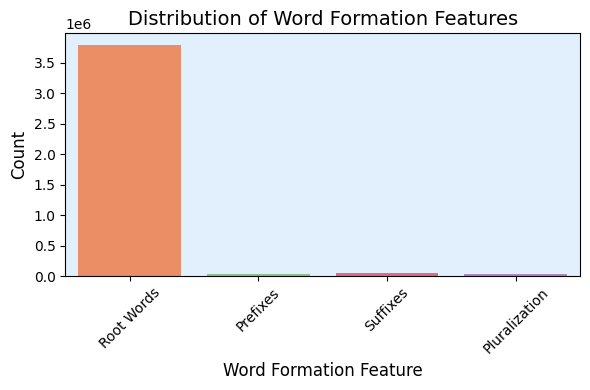

In [8]:
# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Extract word formation features
features = {
    "Root Words": 0,
    "Prefixes": 0,
    "Suffixes": 0,
    "Pluralization": 0,
}

for sentence in text_data:
    for word in word_tokenize(sentence):
        root = lemmatizer.lemmatize(word.lower())
        if word.endswith("ing") or word.endswith("ed"):
            features["Suffixes"] += 1
        elif word.startswith("un"):
            features["Prefixes"] += 1
        elif root != word.lower():
            features["Pluralization"] += 1
        else:
            features["Root Words"] += 1

# Convert features dictionary to DataFrame
features_df = pd.DataFrame(list(features.items()), columns=["Feature", "Count"])

plt.gcf().set_facecolor('#b1d8fe')  # Set figure background color

# Plot using Seaborn
plt.figure(figsize=(6, 4))
sns.barplot(x="Feature", y="Count", data=features_df, palette=["#ff864f", "#83ca89", "#fa5477", '#ac7cd1'])
plt.title("Distribution of Word Formation Features", fontsize=14)

# Calculate the maximum count for annotation positioning
max_count = features_df["Count"].max()

plt.xlabel("Word Formation Feature", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
# Set the axis background color to a light blue
plt.gca().set_facecolor('#e2f0fe')
plt.tight_layout()
plt.show()

## 3. Syntactic Features
We will analyze the part-of-speech tags for words in the text and visualize the distribution of POS tags.

* Focus on the arrangement of words and phrases to create sentences.

* Examples:

    1. Part of speech (e.g., nouns, verbs, adjectives).
    2. Sentence structure (e.g., Subject-Verb-Object).
    3. Dependency relations (e.g., which words modify others).

### POS Tagging

**Part-of-Speech (POS) Tagging**
  * Purpose: Identifies the grammatical role (e.g., noun, verb, adjective) of each word.
  * Steps:
    * Each sentence is tokenized into words.
    * Each word is tagged using nltk.pos_tag.
    * Frequencies of all POS tags are calculated and visualized as a bar chart.
* Visualization:
    * A bar plot shows the distribution of POS tags, revealing the grammatical patterns in the text.


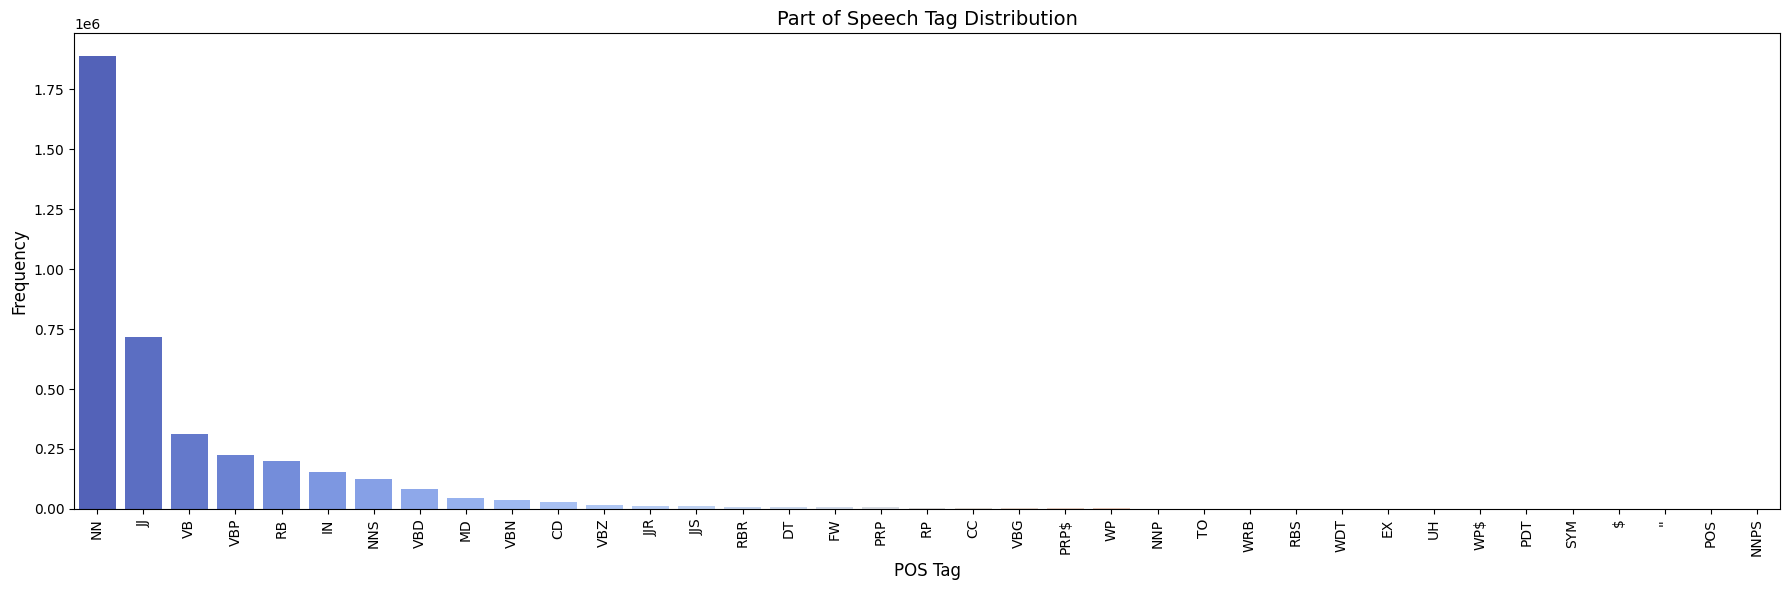

In [10]:
# Load the spaCy model for dependency parsing
nlp = spacy.load("en_core_web_sm")

# Define POS tagging function and sentence structure extraction function
def get_pos_tags(text):
    tokens = word_tokenize(text)
    return pos_tag(tokens)

def extract_svo(text):
    doc = nlp(text)
    subjects = []
    verbs = []
    objects = []
    for token in doc:
        if "subj" in token.dep_:
            subjects.append(token.text)
        elif "obj" in token.dep_:
            objects.append(token.text)
        elif token.pos_ == "VERB":
            verbs.append(token.text)
    return subjects, verbs, objects

# Function to get lemmatized words
def lemmatize_text(text):
    doc = nlp(text)
    return ' '.join([token.lemma_ for token in doc])

# POS tagging for text_data
pos_data = [str(text) for text in text_data if isinstance(text, str) and text.strip()]
pos_tags = [get_pos_tags(text) for text in pos_data]

# Flatten POS tags to calculate frequency distribution
all_pos_tags = [tag for sublist in pos_tags for _, tag in sublist]
pos_tag_freq = Counter(all_pos_tags)

# Lemmatize the text
lemmatized_text_data = [lemmatize_text(text) for text in pos_data]

# Extract Subject-Verb-Object (SVO) structure for each sentence
svo_data = [extract_svo(text) for text in pos_data]

# Calculate frequency of SVO structure
subject_count = sum([len(svo[0]) for svo in svo_data])  # Total number of subjects
verb_count = sum([len(svo[1]) for svo in svo_data])  # Total number of verbs
object_count = sum([len(svo[2]) for svo in svo_data])  # Total number of objects

# Convert POS tag frequencies to DataFrame
pos_tag_df = pd.DataFrame(list(pos_tag_freq.items()), columns=['POS Tag', 'Frequency'])

# Plot POS tag distribution
plt.figure(figsize=(18, 6))
sns.barplot(x="POS Tag", y="Frequency", data=pos_tag_df.sort_values('Frequency', ascending=False), palette='coolwarm')
plt.title('Part of Speech Tag Distribution', fontsize=14)
plt.xlabel('POS Tag', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.tight_layout()
plt.show()

### SVO Analysis

**Subject-Verb-Object (SVO) Extraction**
  * Purpose: Identifies the core components of sentences (subjects, verbs, objects) using spaCy's dependency parsing.
  * Steps:
    * Each sentence is processed with spaCy's dependency parser.
    * Words are classified as subjects, verbs, or objects based on their syntactic roles (subj, obj, or VERB).
    * Counts of each SVO component are calculated.

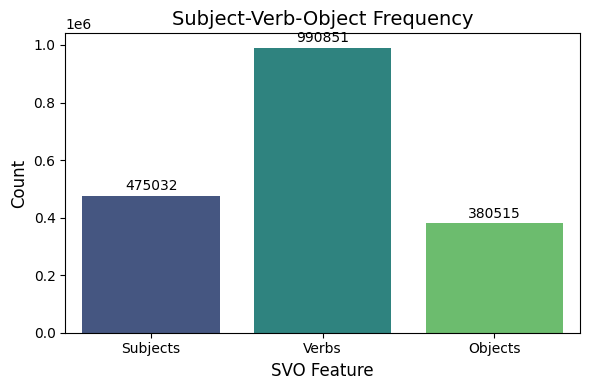

In [11]:
# Plot SVO counts
svo_counts = {
    'Subjects': subject_count,
    'Verbs': verb_count,
    'Objects': object_count
}

svo_df = pd.DataFrame(list(svo_counts.items()), columns=['SVO Feature', 'Count'])

plt.figure(figsize=(6, 4))
sns.barplot(x="SVO Feature", y="Count", data=svo_df, palette='viridis')

# Add annotations for counts above the bars
for index, row in svo_df.iterrows():
    plt.text(
        x=index,
        y=row['Count'] + max(svo_df['Count']) * 0.02,  # Slightly above the bar
        s=str(row['Count']),
        ha='center',
        fontsize=10
    )

plt.title('Subject-Verb-Object Frequency', fontsize=14)
plt.xlabel('SVO Feature', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

## 4. Semantic Features
We can analyze named entities in the text using Named Entity Recognition (NER) to extract semantic features like locations, organizations, and persons.
* Concerned with the meaning of words and sentences.

* Examples:

    1. Word sense (e.g., "bank" as a financial institution vs. riverbank).
    2. Synonyms, antonyms, and hypernyms.
    3. Semantic roles (e.g., agent, object, location).

### Named Entity Recognition (NER) Distribution

1. **Entity Extraction:**

  * Entities: The script uses a Named Entity Recognition (NER) model (likely from spaCy) to identify and classify entities in the text.
  * The entities are categorized into types such as Person, Organization, and Location.
  * The number of each type of entity is counted, and stored in a dictionary.
2. **Data Preparation:**

  * The dictionary is converted into a DataFrame with two columns:
    * Entity Type: Describes the type of entity (Person, Organization, Location).
    * Count: The frequency of each entity type in the text.
3. **Visualization:**

  * A bar plot is generated using Seaborn, where the x-axis represents the Entity Type and the y-axis represents the Count of each entity type.
  * The plot shows how many instances of each type of entity are present in the text data.

In [12]:
# Load the spaCy model for NER
nlp = spacy.load("en_core_web_sm")

# Word Sense Disambiguation and Semantic Analysis using WordNet
def get_synonyms_antonyms_hypernyms(word):
    synonyms = set()
    antonyms = set()
    hypernyms = set()

    # Getting word synonyms, antonyms, and hypernyms using WordNet
    for syn in wn.synsets(word):
        # Adding synonyms (use lemma names directly)
        synonyms.update(lemma.name() for lemma in syn.lemmas())
        # Adding antonyms (ensure antonyms exist)
        antonyms.update(lemma.antonyms()[0].name() for lemma in syn.lemmas() if lemma.antonyms())
        # Adding hypernyms (use hypernym names)
        hypernyms.update(hypernym.name().split('.')[0] for hypernym in syn.hypernyms())

    # Return only the first 5 elements
    return list(synonyms)[:5], list(antonyms)[:5], list(hypernyms)[:5]

# Extract Named Entities using spaCy
def extract_named_entities(text):
    doc = nlp(text)
    entities = {'Person': [], 'Organization': [], 'Location': []}

    for ent in doc.ents:
        if ent.label_ == "PERSON":
            entities['Person'].append(ent.text)
        elif ent.label_ == "ORG":
            entities['Organization'].append(ent.text)
        elif ent.label_ == "GPE":
            entities['Location'].append(ent.text)

    return entities

#### Semantic Feature Distribution

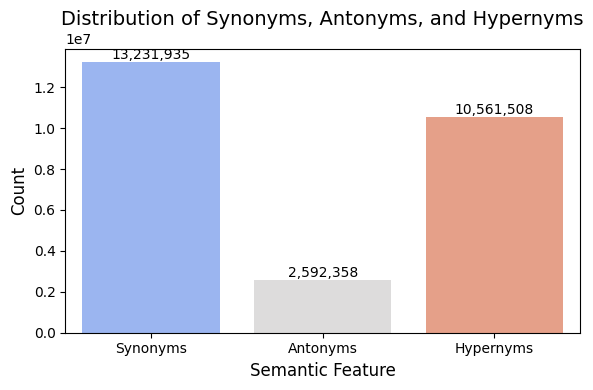

In [13]:
# For each word in the text_data, get synonyms, antonyms, and hypernyms
synonyms = []
antonyms = []
hypernyms = []

for sentence in text_data:
    for word in word_tokenize(sentence):
        word = word.lower()
        syn, ant, hyp = get_synonyms_antonyms_hypernyms(word)
        synonyms.extend(syn)
        antonyms.extend(ant)
        hypernyms.extend(hyp)

# Frequency distributions for Synonyms, Antonyms, and Hypernyms
synonym_freq = Counter(synonyms)
antonym_freq = Counter(antonyms)
hypernym_freq = Counter(hypernyms)

# Extract named entities from text_data
entities = {'Person': [], 'Organization': [], 'Location': []}
for sentence in text_data:
    named_entities = extract_named_entities(sentence)
    for key, value in named_entities.items():
        entities[key].extend(value)

# Plot the distribution of synonyms, antonyms, and hypernyms
semantic_data = {
    'Synonyms': sum(synonym_freq.values()),
    'Antonyms': sum(antonym_freq.values()),
    'Hypernyms': sum(hypernym_freq.values())
}

# Assuming 'semantic_data' is already available and semantic_df is created
semantic_df = pd.DataFrame(list(semantic_data.items()), columns=['Semantic Feature', 'Count'])

# Create the bar plot
plt.figure(figsize=(6, 4))
ax = sns.barplot(x="Semantic Feature", y="Count", data=semantic_df, palette='coolwarm')

# Add the count labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=10, color='black',
                xytext=(0, 5), textcoords='offset points')

# Title and labels
plt.title('Distribution of Synonyms, Antonyms, and Hypernyms', fontsize=14)
plt.xlabel('Semantic Feature', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

#### NER Distribution:

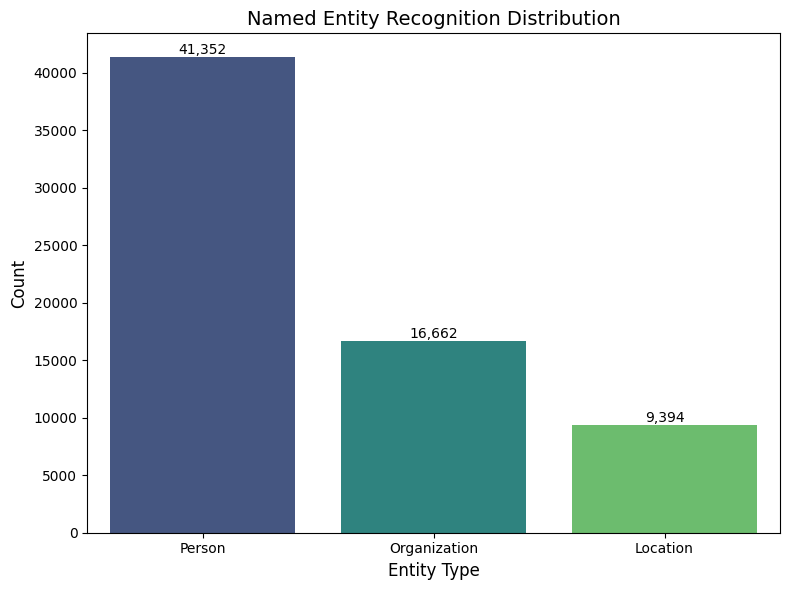

In [14]:
# Plot the distribution of Named Entities (Persons, Organizations, Locations)
entity_data = {
    'Person': len(entities['Person']),
    'Organization': len(entities['Organization']),
    'Location': len(entities['Location'])
}

# Assuming 'entity_data' is already available and entity_df is created
entity_df = pd.DataFrame(list(entity_data.items()), columns=['Entity Type', 'Count'])

# Create the bar plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(x="Entity Type", y="Count", data=entity_df, palette='viridis')

# Add the count labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=10, color='black',
                xytext=(0, 5), textcoords='offset points')

# Title and labels
plt.title('Named Entity Recognition Distribution', fontsize=14)
plt.xlabel('Entity Type', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

## 5. Pragmatic Features
We can analyze discourse markers and other contextual cues. These are not explicitly labeled, but common discourse markers like "however," "therefore," etc., can be counted.
* Deal with how context influences meaning.

* Examples:

    1. Speech acts (e.g., requests, commands, questions).
    2. Discourse markers (e.g., "however," "therefore").
    3. Implicatures (e.g., indirect meanings).

### Discourse Markers and Speech Acts Analysis

**1. Discourse Marker Counting**
  1. **Purpose:** Identifies specific words or phrases, known as discourse markers, that indicate transitions, emphasis, or relationships between ideas (e.g., "however," "therefore").
  2. **Process:**
    * Converts each sentence to lowercase and tokenizes it into words.
    * Checks if any discourse marker appears in the tokenized words.
    * Counts occurrences of each marker using Counter.

**2. Speech Act Classification**

  1. **Purpose:** Categorizes sentences into one of four types based on their structure:

      * **Question:** Ends with a question mark.

      * **Request:** Starts with polite or imperative words (e.g., "please," "could").

      * **Command:** Ends with an exclamation mark.

      * **Statement:** Default category for other sentences.

  2. **Process:**
    * Analyzes the start and end of each sentence.
    * Increments a count for the respective speech act.

In [9]:
# Load spaCy model
nlp = spacy.load("en_core_web_sm")

discourse_markers = [
    'however', 'therefore', 'meanwhile', 'but', 'because', 'thus', 'furthermore', 'moreover',
    'in addition', 'consequently', 'nevertheless', 'on the other hand', 'as a result', 'for example',
    'for instance', 'in conclusion', 'ultimately', 'despite', 'although', 'yet', 'even though',
    'still', 'also', 'besides', 'in fact', 'in contrast', 'on the contrary', 'as well',
    'likewise', 'similarly', 'either', 'or', 'hence', 'accordingly', 'otherwise', 'thus', 'therefore',
    'finally', 'generally speaking', 'at the same time', 'in other words'
]

In [10]:
# Define function to classify speech acts based on sentence types
def classify_speech_act(sentence):
    # Check if the sentence ends with a question mark
    if sentence.strip().endswith('?'):
        return 'Question'
    # Check if the sentence starts with a verb (imperative)
    elif sentence.strip().lower().startswith(('please', 'kindly', 'could', 'would')):
        return 'Request'
    elif sentence.strip().endswith('!'):
        return 'Command'
    else:
        return 'Statement'

In [11]:
# Initialize counters for discourse markers and speech acts
discourse_marker_count = Counter()
speech_act_count = Counter()

In [12]:
# Process each sentence
for sentence in text_data:
    # Count discourse markers
    words = word_tokenize(sentence.lower())
    for marker in discourse_markers:
        if marker in words:
            discourse_marker_count[marker] += 1

    # Classify speech act
    speech_act = classify_speech_act(sentence)
    speech_act_count[speech_act] += 1

#### Discourse Marker Frequency

1. **Classify Speech Acts:** It categorizes sentences as questions, requests, commands, or statements based on their structure.

2. **Count Discourse Markers:** The goal is to count how often specific discourse markers (e.g., "however", "therefore") appear in the text, but the counting part is missing.

3. **Plot Discourse Marker Frequency:** The code prepares a bar plot to visualize the frequency of discourse markers, but since no markers are counted yet, the plot will be empty.

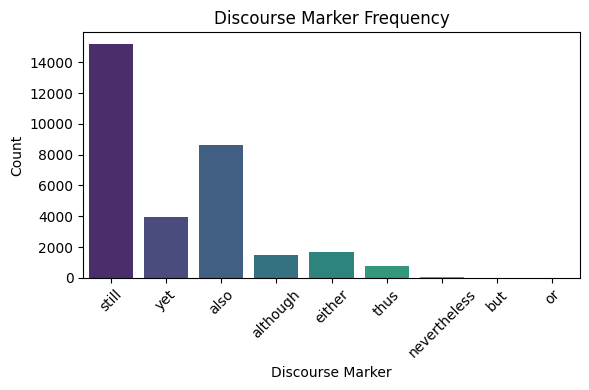

In [13]:
# Convert the discourse marker counts to DataFrame for plotting
discourse_df = pd.DataFrame(list(discourse_marker_count.items()), columns=['Discourse Marker', 'Count'])

# Plot discourse markers frequency
plt.figure(figsize=(6, 4))
ax = sns.barplot(x='Discourse Marker', y='Count', data=discourse_df, palette='viridis')

# Title and labels
plt.title('Discourse Marker Frequency')
plt.xlabel('Discourse Marker')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

#### Speech Act Classification

In this code, you're analyzing speech acts in a set of text data. Here's what's happening:

  1. **Count speech acts:** You're using a speech_act_count counter to track the frequency of different speech acts (e.g., Question, Request, Command, Statement).

  2. **Classify sentences:** Each sentence is checked to see if it's a:

    * Question (ends with ?),
    * Request (starts with specific verbs like "please" or "could"),
    * Command (ends with !),
    * Statement (all other sentences).
  3. **Update counts:** For each sentence, you classify the speech act and update the count.

  4. **Plot the results:** You create a bar plot to visualize how often each speech act occurs in the text.


This helps analyze the intent behind the sentences in the text and understand the structure of communication.

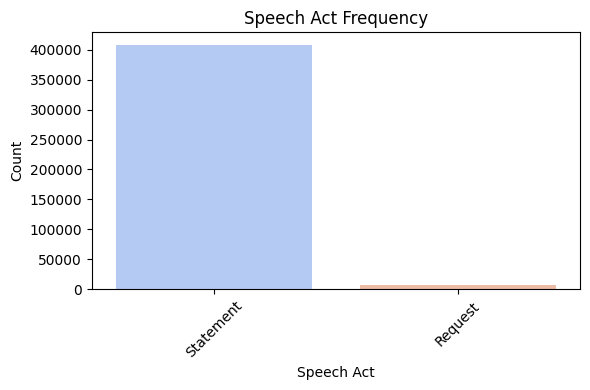

In [14]:
# Convert the speech act counts to DataFrame for plotting
speech_act_df = pd.DataFrame(list(speech_act_count.items()), columns=['Speech Act', 'Count'])

# Plot speech act frequency
plt.figure(figsize=(6, 4))
ax = sns.barplot(x='Speech Act', y='Count', data=speech_act_df, palette='coolwarm')

# Title and labels
plt.title('Speech Act Frequency')
plt.xlabel('Speech Act')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

## 6. Lexical Features
We will analyze vocabulary richness and the frequency of words.
* Relate to word choice and usage.
* Examples:
    1. Word frequency.
    2. N-grams (sequences of n words or characters).
    3. Named entities (e.g., "Paris" as a location).

### Top 10 Most Common Words (Non-Lemmatized)

1. **Convert to Strings:** Ensures all items in text_data are treated as strings.
2. **Count Word Frequency:**
    * Tokenizes words from all sentences.
    * Counts occurrences of each word using Counter.
3. **Extract Top 10 Words:** Retrieves the 10 most frequently occurring words.
4. **Pie Chart:** Visualizes the word frequencies as proportions in a pie chart.

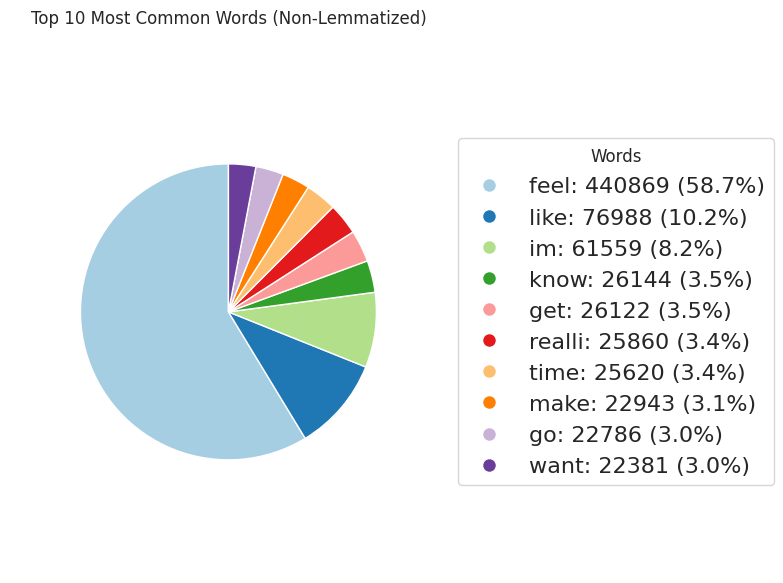

In [21]:
# Most common words (non-lemmatized)
all_words = ' '.join(text_data).split()
word_freq = Counter(all_words)

# Get the 10 most common words
most_common_words = word_freq.most_common(10)

# Prepare data for the pie chart
words, counts = zip(*most_common_words)

# Apply Seaborn style
sns.set(style="whitegrid")

# Plot pie chart using matplotlib without words and percentages
plt.figure(figsize=(8, 6))
colors = plt.cm.Paired.colors
plt.pie(counts, labels=None, startangle=90, colors=colors, textprops={'fontsize': 12})

# Add a custom legend beside the pie chart with percentages
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in colors]
labels = [f"{word}: {count} ({pct}%)" for word, count, pct in zip(words, counts, [f'{c / sum(counts) * 100:.1f}' for c in counts])]

plt.legend(handles, labels, title="Words", loc="center left", bbox_to_anchor=(1, 0.5), fontsize=16)

# Title and layout
plt.title('Top 10 Most Common Words (Non-Lemmatized)', pad=20)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()  # Adjust layout to prevent cutting off of the legend
plt.show()

### Top 2-gram Frequencies

1. **Tokenization:** It first tokenizes the text data (each sentence) into individual words.
2. **Generating N-grams:** It creates bigrams (pairs of consecutive words) from the tokenized sentences.
3. **Counting N-gram Frequency:** It counts the frequency of each bigram across the entire dataset.
4. **Data Preparation:** The N-grams are then converted to a string format (instead of a tuple) and stored in a DataFrame.
5. **Sorting and Plotting:** The top 10 most frequent bigrams are sorted by frequency, and a bar plot is generated to visualize the frequencies of these bigrams.

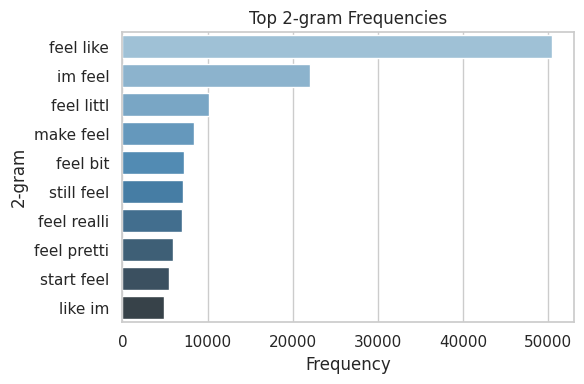

In [22]:
# Tokenize the text
tokenized_data = [word_tokenize(sentence.lower()) for sentence in text_data]

# Generate N-grams (let's use bigrams for this example)
n = 2  # Bigram (2-grams)
all_ngrams = []

for sentence in tokenized_data:
    ngram_list = ngrams(sentence, n)
    all_ngrams.extend(ngram_list)

# Count the frequency of each N-gram
ngram_freq = Counter(all_ngrams)

# Prepare data for plotting
ngram_df = pd.DataFrame(ngram_freq.items(), columns=['N-gram', 'Frequency'])
ngram_df['N-gram'] = ngram_df['N-gram'].apply(lambda x: ' '.join(x))  # Join tuple into string

# Sort the N-grams by frequency
ngram_df = ngram_df.sort_values(by='Frequency', ascending=False).head(10)

# Plot the N-gram frequencies using Seaborn
plt.figure(figsize=(6, 4))
sns.barplot(x='Frequency', y='N-gram', data=ngram_df, palette='Blues_d')
plt.title(f'Top {n}-gram Frequencies')
plt.xlabel('Frequency')
plt.ylabel(f'{n}-gram')
plt.tight_layout()
plt.show()

## 7. Stylistic Features
We can measure sentence length (number of words per sentence) and analyze its distribution.
* Reflect writing or speaking style.
* Examples:
    1. Sentence length.
    2. Use of passive or active voice.
    3. Vocabulary richness.

### Sentence Length Distribution

1. **Sentence Length Calculation:** It calculates the length of each sentence by counting the number of words in it. This is done by tokenizing each sentence using nltk.word_tokenize(), then calculating the length of the tokenized sentence.

2. **Data Preparation:** The sentence lengths are stored in a DataFrame (sentence_lengths_df) for easier handling, especially when plotting using Seaborn.

3. **Plotting:** A histogram is created to show the distribution of sentence lengths. The sns.histplot() function is used, which provides a histogram along with an optional Kernel Density Estimate (KDE) curve. This is done with a light green color for the bars.

4. **Title and Labels:** The plot is given a title ("Sentence Length Distribution") and labeled axes: the x-axis represents the "Sentence Length (Number of Words)", and the y-axis represents the "Frequency".

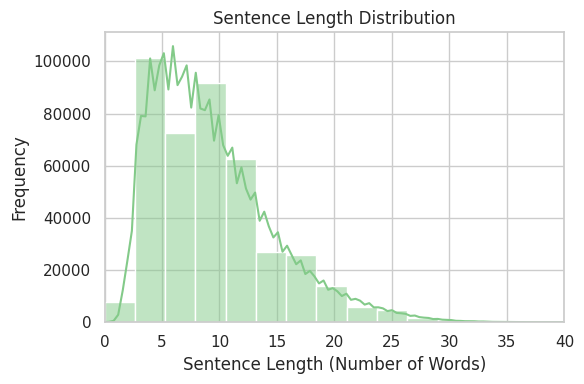

In [23]:
# Calculate sentence length (number of words in each sentence)
sentence_lengths = [len(nltk.word_tokenize(sentence)) for sentence in text_data]

# Convert to a DataFrame for easier handling in Seaborn
sentence_lengths_df = pd.DataFrame(sentence_lengths, columns=["Sentence Length"])

# Plot sentence length distribution using Seaborn
plt.figure(figsize=(6, 4))
sns.histplot(sentence_lengths_df['Sentence Length'], bins=30, kde=True, color="#83ca89")
plt.title('Sentence Length Distribution')
plt.xlabel('Sentence Length (Number of Words)')
plt.ylabel('Frequency')

# Set x-axis limit to 40
plt.xlim(0, 40)

plt.tight_layout()
plt.show()

### Active vs Passive Voice Distribution

1. **Voice Detection:** It uses spaCy to analyze the syntactic structure of each sentence. It checks for passive voice based on the presence of the auxiliary verb (aux:pass).
2. **Result:** It labels each sentence as "Active" or "Passive".
3. **Visualization:** A count plot shows the frequency of active vs passive sentences.

In [24]:
# Load spaCy's English model
nlp = spacy.load("en_core_web_sm")

# Function to check if the sentence is in active or passive voice
def detect_voice(text):
    doc = nlp(text)
    for token in doc:
        if "aux:pass" in token.dep_:
            return "Passive"
    return "Active"

# Detect voice and calculate sentence length
voices = []
sentence_lengths = []

for text in text_data:
    voice = detect_voice(text)
    voices.append(voice)
    sentence_lengths.append(len(text.split()))

# Combine into a DataFrame
df = pd.DataFrame({
    "Voice": voices,
    "Sentence Length": sentence_lengths
})

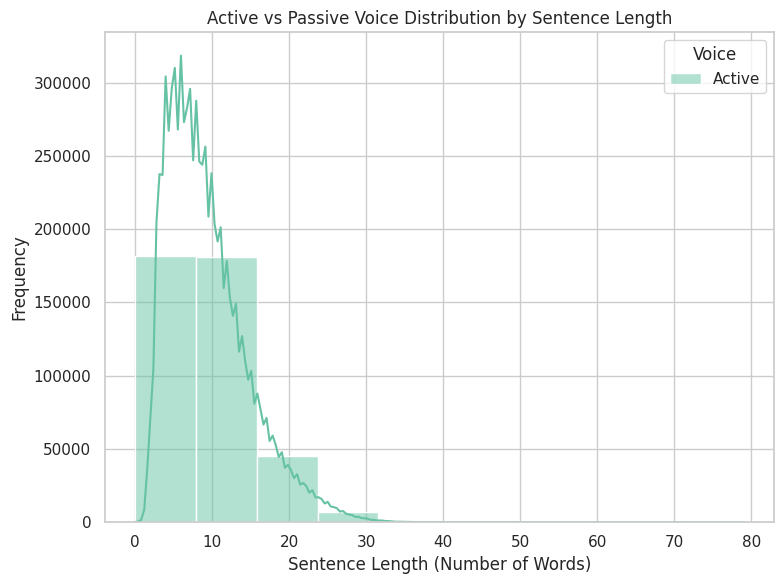

In [25]:
# Plot distributions for Active and Passive sentences
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x="Sentence Length", hue="Voice", bins=10, kde=True, palette="Set2")
plt.title("Active vs Passive Voice Distribution by Sentence Length")
plt.xlabel("Sentence Length (Number of Words)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

### Vocabulary Richness Distribution (Type-Token Ratio)

This code calculates and visualizes the Vocabulary Richness (Type-Token Ratio, TTR) of sentences in text_data.

1. **TTR Calculation:** It computes the ratio of unique words to total words in each sentence.
2. **Plot:** A histogram is created to show the distribution of TTR values across the sentences.
3. **Summary:** The average TTR is calculated and displayed.

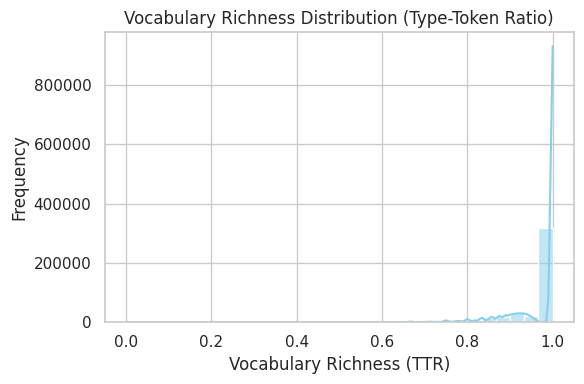

Average Vocabulary Richness (TTR): 0.97


In [26]:
# Calculate vocabulary richness (Type-Token Ratio)
def calculate_vocabulary_richness(text):
    tokens = nltk.word_tokenize(text.lower())  # Tokenize and convert to lowercase
    num_unique_words = len(set(tokens))       # Number of unique words (types)
    total_words = len(tokens)                 # Total number of words (tokens)
    return num_unique_words / total_words if total_words > 0 else 0  # Handle division by zero

# Apply the function to each text in the dataset
vocabulary_richness = [calculate_vocabulary_richness(text) for text in text_data]

# Convert to DataFrame for easier handling in Seaborn
vocabulary_richness_df = pd.DataFrame(vocabulary_richness, columns=["Vocabulary Richness"])

# Plot Vocabulary Richness Distribution using Seaborn
plt.figure(figsize=(6 ,4))
sns.histplot(vocabulary_richness_df['Vocabulary Richness'], bins=30, kde=True, color='skyblue')
plt.title('Vocabulary Richness Distribution (Type-Token Ratio)')
plt.xlabel('Vocabulary Richness (TTR)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Display summary statistics
mean_richness = np.mean(vocabulary_richness)
print(f"Average Vocabulary Richness (TTR): {mean_richness:.2f}")